In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import recall_score, precision_score

from sklearn.metrics import roc_curve, roc_auc_score
 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

## 앙상블 기법
* 무작위로 선택된 수천명의 사람들에게 복잡하거나 어려운 질문을 하고 대답을 모은다고 가정
* 이렇게 모아진 답은 한명의 전문가의 답보다 나을 수 있음
     + 집단지성, 대중의 지혜
* 이처럼 일련의 분석기/예측기로 부터 예측을 수집하면 가장 좋은 하나의 모델보다 더 좋은 예측을 얻을 수 있음
     + 일련의 분석기/예측기 => 앙상블
     + 앙상블을 통해 학습 => 앙상블 학습
     + 앙상블 학습 알고리즘 => 보팅, 베깅, 부스팅, 스태킹
* 머신러닝 경진대회(kaggle, 공모전)에서 우승하고 싶다면?
     + => 여러 앙상블 방법을 이용!

## 투표기반 분류기votting
* 정확도가 좋은 분류기 여러개를 이용해서 학습시킴
     + => 로지스틱/SVM/랜덤포레스트/K최근접이웃 등등
* 각 분류기로 부터 예측을 모아 가장 많이 선택된
  클래스를 예측함 => 큰수의 법칙
    + 하드보팅   : 다수결 투표로 결정함, 직접투표분류기
    + 소프트보팅 : 확률의 총합으로 결정, 간접투표분류기

### 테스트용 데이터 생성 및 분할

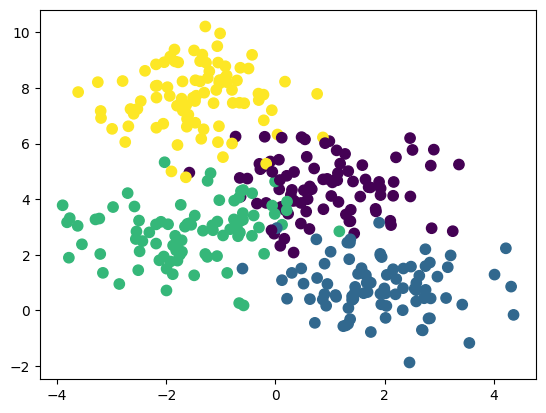

In [12]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=350, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:,0], X[:,1], c=y, s=55)
plt.show()

In [13]:
X_train, X_test, Y_train,Y_test = train_test_split(X,y, train_size=0.7, stratify=y, random_state=2211211555)

## 투표 분류기 생성 1
* 직접투표hard votting : 모든 분류기가 클래스를 예측해서
* 개별 분류기의 최빈값을 계산하고 빈도값이 가장 높은 클래스를 예측

In [14]:
lrclf = LogisticRegression()
dtclf = DecisionTreeClassifier()
svclf = SVC()

In [18]:
# voting : 투표방식 지정(soft/hard)
# estimators : 투표분류기에 사용할 분류기 지정
voteclf = VotingClassifier(voting='hard',estimators=[('lr',lrclf),('dt',dtclf),('svm',svclf)])

## 개별 분류기 성능 비교 1

In [22]:
for clf in (lrclf,dtclf,svclf, voteclf):
    clf.fit(X_train,Y_train)
    print(clf.__class__.__name__,clf.score(X_train,Y_train))

LogisticRegression 0.9180327868852459
DecisionTreeClassifier 1.0
SVC 0.9098360655737705
VotingClassifier 0.9221311475409836


## 개별 분류기 성능 비교 2

In [24]:
for clf in (lrclf,dtclf,svclf, voteclf):
    pred = clf.predict(X_test)
    print(clf.__class__.__name__,accuracy_score(pred,Y_test))

LogisticRegression 0.9245283018867925
DecisionTreeClassifier 0.8962264150943396
SVC 0.9150943396226415
VotingClassifier 0.9150943396226415


### 결정영역 시각화

C:\Users\LG PC\lib\site-packages\mlxtend\plotting\decision_regions.py:300: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


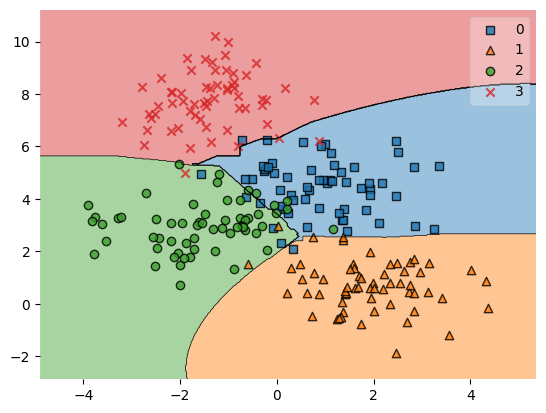

In [26]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train,Y_train,voteclf)
plt.show()

C:\Users\LG PC\lib\site-packages\mlxtend\plotting\decision_regions.py:300: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


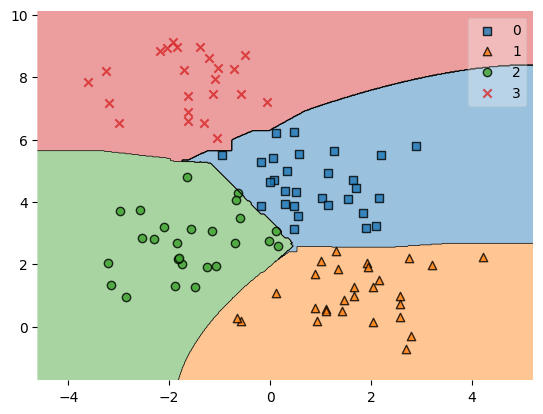

In [28]:
plot_decision_regions(X_test,pred,voteclf)
plt.show()

## 투표 분류기 생성 2
* 간접투표soft votting : 모든 분류기가 클래스의 확률을 예측해서
* 개별 분류기의 평균을 내어 확률이 가장 높은 클래스를 예측

In [42]:
lrclf = LogisticRegression()
dtclf = DecisionTreeClassifier()
svclf = SVC(probability=True)

In [43]:
# voting : 투표방식 지정(soft/hard)
# estimators : 투표분류기에 사용할 분류기 지정
voteclf = VotingClassifier(voting='soft',estimators=[('lr',lrclf),('dt',dtclf),('svm',svclf)])

In [44]:
X_train, X_test, Y_train,Y_test = train_test_split(X,y, train_size=0.7, stratify=y, random_state=2211211555)

## 개별 분류기 성능 비교 1

In [45]:
for clf in (lrclf,dtclf,svclf, voteclf):
    clf.fit(X_train,Y_train)
    print(clf.__class__.__name__,clf.score(X_train,Y_train))

LogisticRegression 0.9180327868852459
DecisionTreeClassifier 1.0
SVC 0.9098360655737705
VotingClassifier 0.9877049180327869


## 개별 분류기 성능 비교 2

In [46]:
for clf in (lrclf,dtclf,svclf, voteclf):
    pred = clf.predict(X_test)
    print(clf.__class__.__name__,accuracy_score(pred,Y_test))

LogisticRegression 0.9245283018867925
DecisionTreeClassifier 0.8962264150943396
SVC 0.9150943396226415
VotingClassifier 0.8962264150943396


### 결정영역 시각화

C:\Users\LG PC\lib\site-packages\mlxtend\plotting\decision_regions.py:300: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


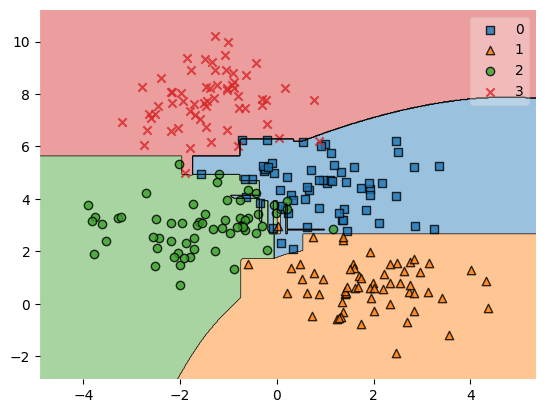

In [47]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train,Y_train,voteclf)
plt.show()

C:\Users\LG PC\lib\site-packages\mlxtend\plotting\decision_regions.py:300: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


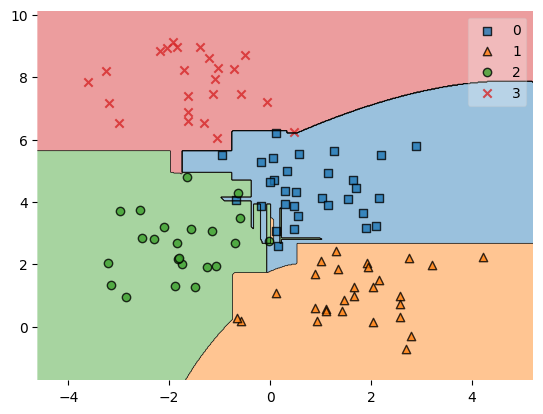

In [49]:
plot_decision_regions(X_test,pred,voteclf)
plt.show()